In [45]:
# FIXME los metros cuadros de terreno no estan bien extraidos con la
# expresion regular, no reconoce los valores mayores a 1000 por el punto

In [46]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import pandas_profiling

import utils
%matplotlib notebook

pd.options.display.float_format = '{:.2f}'.format


# What are some questions that I can answer with this dataset?
Understand your dataset is the fist step of any datascience project. You need to know the limitations and make a list of posible question that could be answering with this dataset. These question can reduce, expande or modify the spoce of your project.

examples: 
- We could have great ideas but poor data
- We could have incorect question for our dataset
- We could have a rich dataset ....

**Data**: We have a set of features of house for sale in a specific time windows.  
**Questions**:
- Could we predict the price of a house with the this set of features?
- Could we improve the price prediction using NLP thechnique on text description?

# Look at my dataset
- How many rows are in my dataset?
- How many columns are in my dataset?
- What data types are in the columns?
- are there missing values in the dataset? Do we infer missing values? how?
- are there outlier values? 

Data types:
- Numeric:
    - Discrete: variables that have finite posible values.
    - Continuous:  variables that can have an infinite number of possible values
    - Binary or Dichotomous: only 2 posible values, yes/no
- Categorical, variables that have 2 or more possible values
    - Ordinal: these values have a meaningful order or rank. Ex. marks, A, B, C
    - Nominal: the order of those values have no meaning. Ex, names
- Unstructured
    - text

## Load dataset


In [47]:
path_file = '../data/preprocessed/dataset.csv'

# Read csv file
df = pd.read_csv(path_file)

In [48]:
# Get number of rows and columns
df.shape

(28620, 46)

In [49]:
# Get data types of columns
# df.info()
df.dtypes

acepta_permuta           float64
altura_permitida         float64
ambientes                float64
ambientes_extra          float64
ano_de_construccion      float64
aptos_por_piso           float64
banos                    float64
banos_extra              float64
barrio                    object
cantidad_de_pisos        float64
casco                    float64
descripcion               object
direccion                 object
disposicion               object
distancia_al_mar         float64
dormitorios              float64
dormitorios_extra        float64
estado                    object
extra                     object
financia                 float64
garajes                  float64
garajes_extra            float64
gastos_comunes           float64
gastos_comunes_moneda    float64
hectareas                float64
huespedes                float64
inmobiliaria              object
longitud_frente          float64
m2_de_la_terraza         float64
m2_del_terreno           float64
m2_edifica

In [50]:
# Check if there are missing values in each columns
df.isnull().any()

acepta_permuta            True
altura_permitida          True
ambientes                 True
ambientes_extra           True
ano_de_construccion       True
aptos_por_piso            True
banos                     True
banos_extra               True
barrio                    True
cantidad_de_pisos         True
casco                     True
descripcion               True
direccion                 True
disposicion               True
distancia_al_mar          True
dormitorios               True
dormitorios_extra         True
estado                    True
extra                     True
financia                  True
garajes                   True
garajes_extra             True
gastos_comunes            True
gastos_comunes_moneda     True
hectareas                 True
huespedes                 True
inmobiliaria              True
longitud_frente           True
m2_de_la_terraza          True
m2_del_terreno            True
m2_edificados             True
oficina                   True
penthous

In [51]:
# Get percentage of missing values from each columns
# df.count()
df.notnull().sum()/df.shape[0]*100

acepta_permuta            3.19
altura_permitida          1.08
ambientes                10.06
ambientes_extra          10.06
ano_de_construccion      56.31
aptos_por_piso           22.23
banos                    87.51
banos_extra              87.51
barrio                   91.65
cantidad_de_pisos        22.75
casco                     0.07
descripcion              99.19
direccion                32.13
disposicion              66.23
distancia_al_mar         18.04
dormitorios              80.48
dormitorios_extra        80.48
estado                   89.11
extra                    80.70
financia                 14.94
garajes                  37.87
garajes_extra            37.87
gastos_comunes           42.44
gastos_comunes_moneda     0.00
hectareas                 0.19
huespedes                 0.00
inmobiliaria             99.50
longitud_frente           1.31
m2_de_la_terraza         25.06
m2_del_terreno           30.71
m2_edificados            84.74
oficina                  11.22
penthous

## Statistic resume
### Numeric variables

In [52]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
acepta_permuta,913.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
altura_permitida,310.00,21.76,93.38,5.00,9.00,13.00,23.50,1650.00
ambientes,2880.00,2.28,1.67,1.00,1.00,2.00,3.00,7.00
ambientes_extra,2880.00,0.10,0.31,0.00,0.00,0.00,0.00,1.00
ano_de_construccion,16116.00,1988.39,58.75,1060.00,1963.00,1998.00,2017.00,7880.00
aptos_por_piso,6362.00,5.46,100.38,1.00,2.00,3.00,5.00,8000.00
banos,25044.00,1.65,0.78,1.00,1.00,1.00,2.00,3.00
banos_extra,25044.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00
cantidad_de_pisos,6512.00,8.50,26.65,1.00,4.00,10.00,10.00,2101.00
casco,21.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


In [53]:
# df.hvplot.hist(y='precio', bins=range(0, 4000000, 20000), xlim=(0, 4000000), groupby='barrio')

### Categeries resume

In [54]:
df.describe(include='O').transpose()

,count,unique,top,freq
barrio,26229,89,pocitos,4126
descripcion,28388,27127,la zona: 01 del centro esta ubicado en el limi...,19
direccion,9195,6592,26 de marzo,55
disposicion,18954,4,al frente,15804
estado,25504,7,buen estado,10527
extra,23097,14664,garaje,1000
inmobiliaria,28476,1025,las torres,1102
referencia,26317,26312,1081BE,2
sobre,8199,3,otros,4444
tipo_de_publicacion,26322,1,venta,26322


<IPython.core.display.Javascript object>


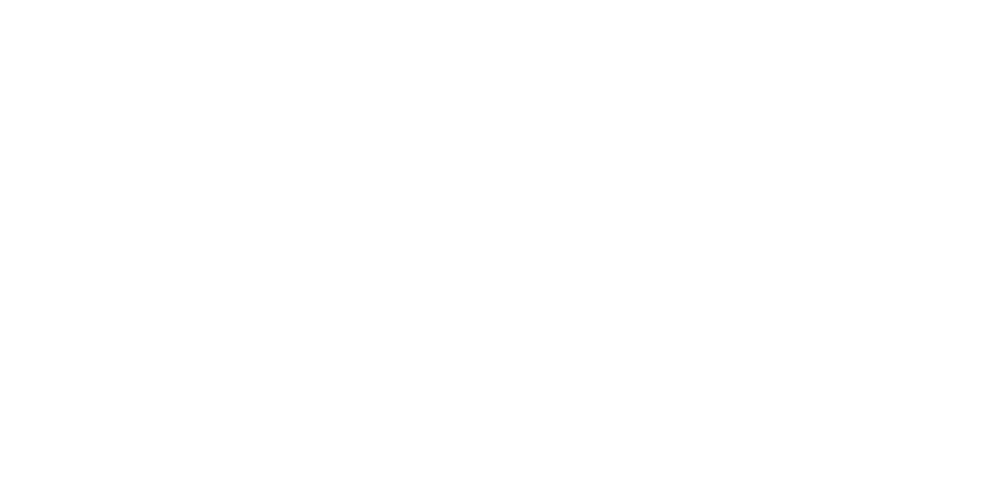

<IPython.core.display.Javascript object>


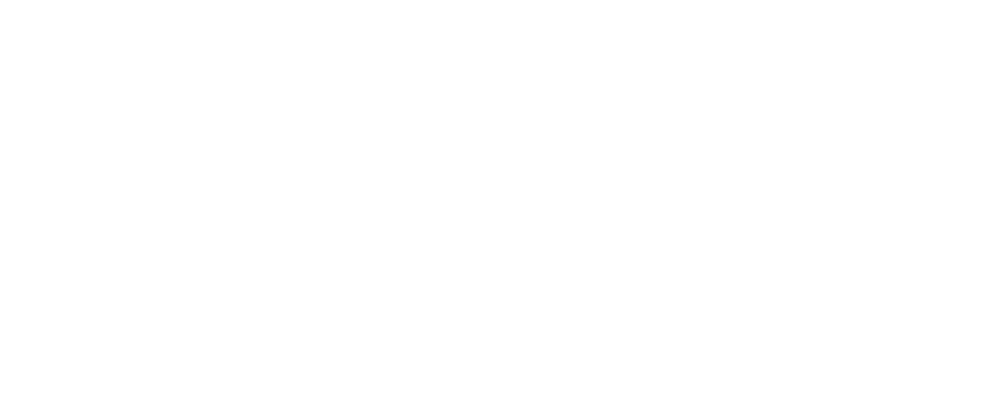

<IPython.core.display.Javascript object>


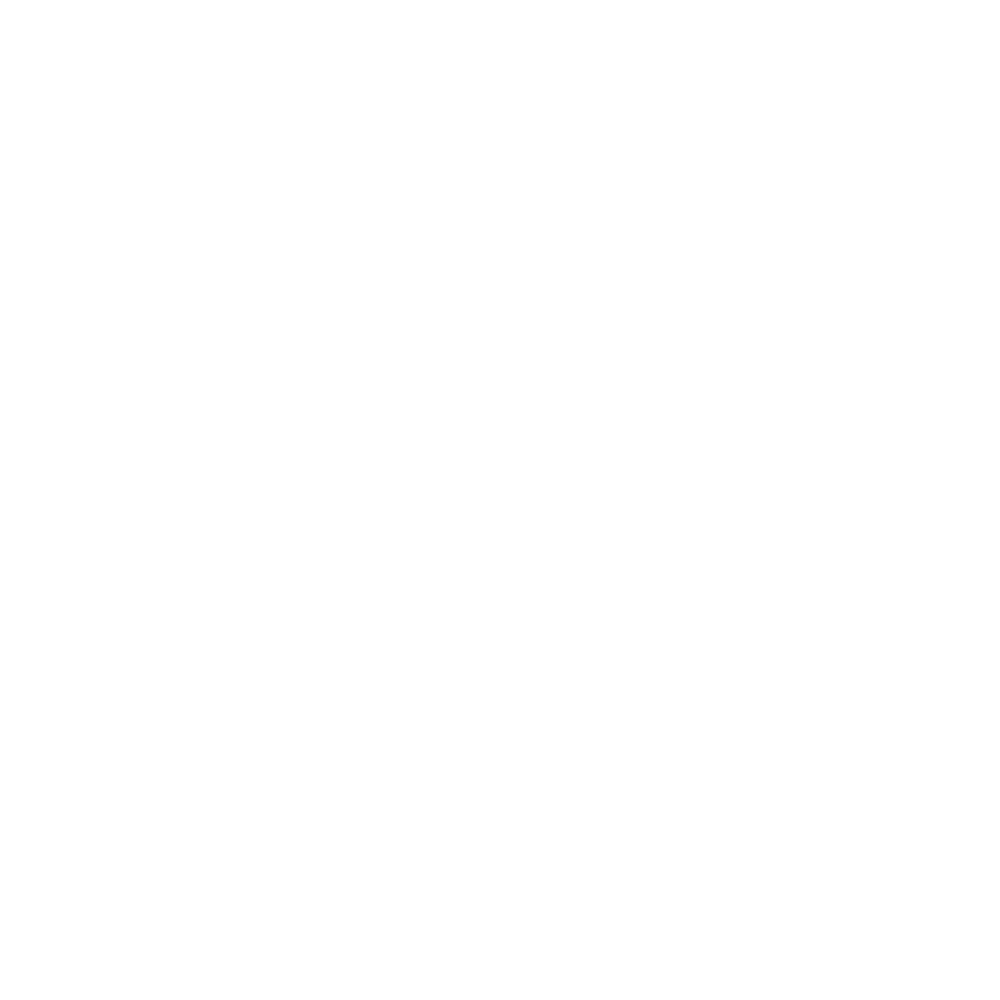

<IPython.core.display.Javascript object>


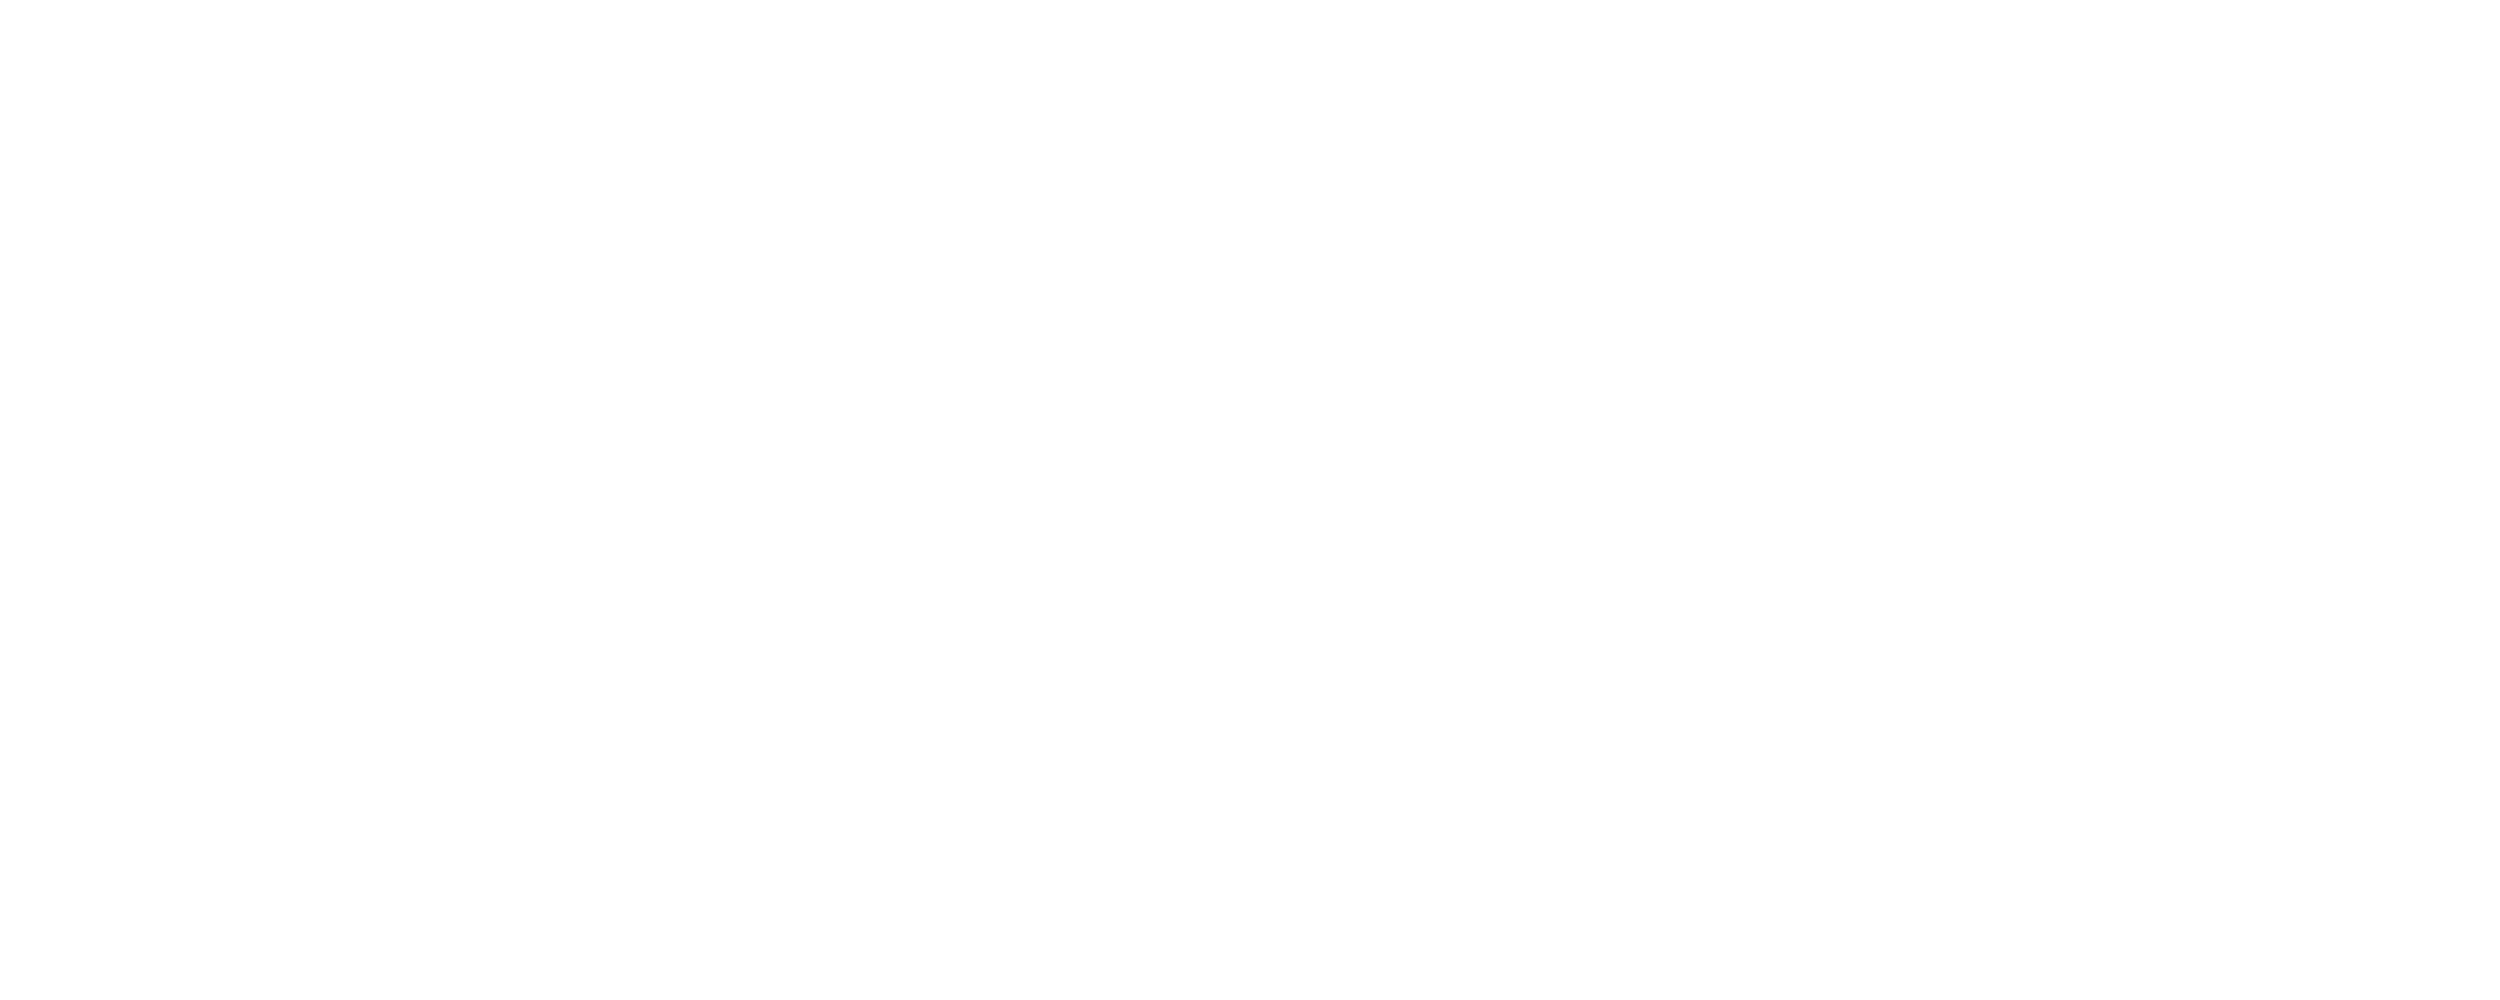

<IPython.core.display.Javascript object>


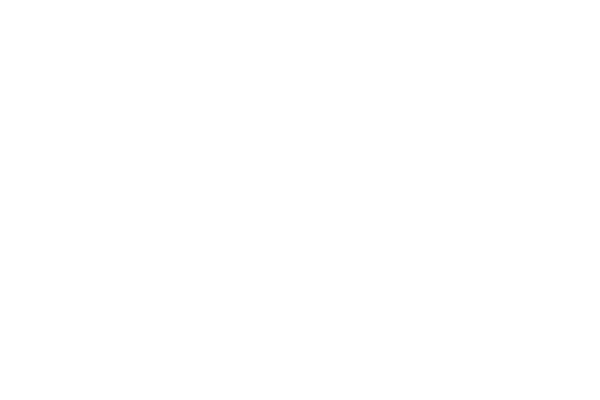

<IPython.core.display.Javascript object>


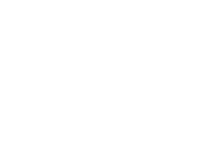

<IPython.core.display.Javascript object>


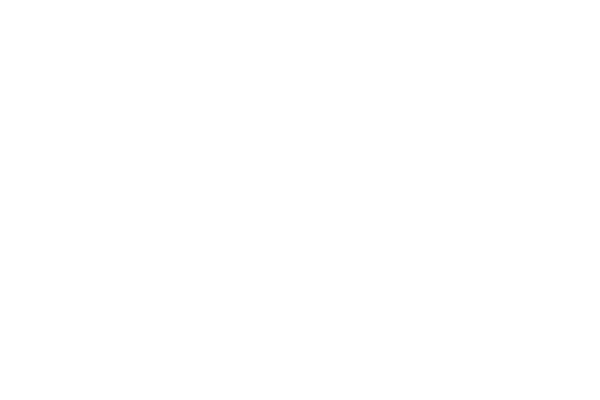

<IPython.core.display.Javascript object>


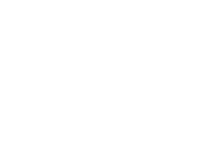

<IPython.core.display.Javascript object>


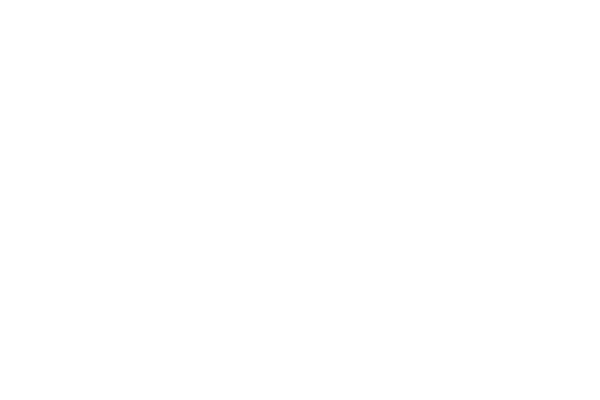

<IPython.core.display.Javascript object>


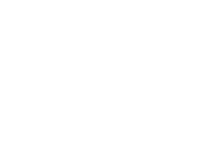

<IPython.core.display.Javascript object>


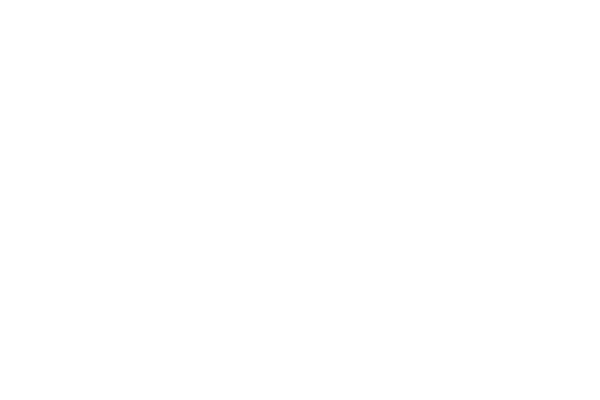

<IPython.core.display.Javascript object>


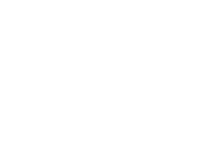

<IPython.core.display.Javascript object>


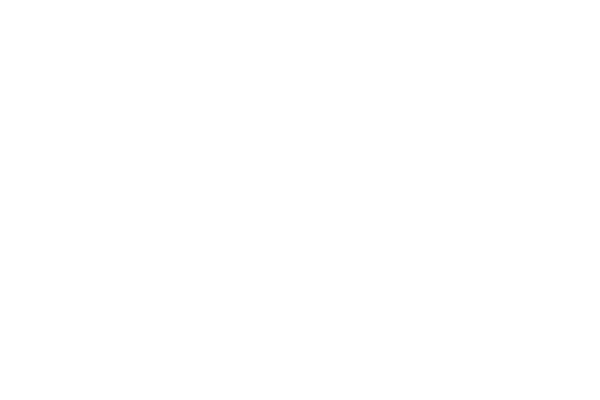

<IPython.core.display.Javascript object>


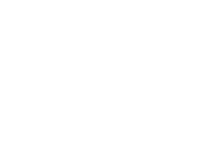

<IPython.core.display.Javascript object>


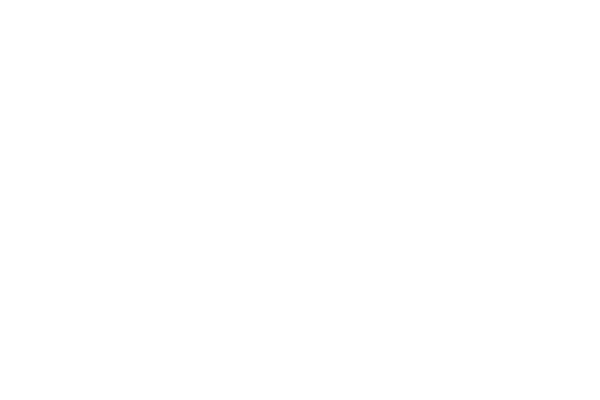

<IPython.core.display.Javascript object>


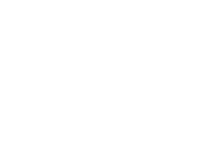

<IPython.core.display.Javascript object>


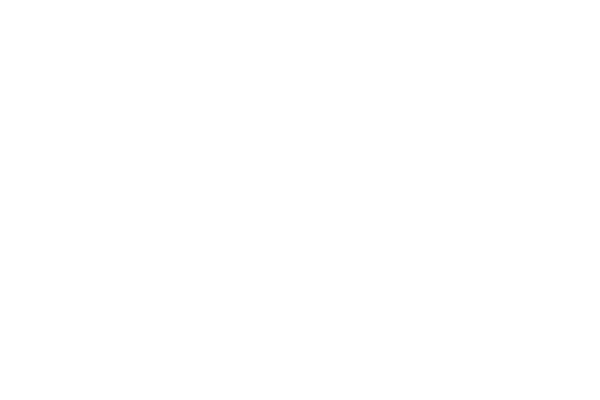

<IPython.core.display.Javascript object>


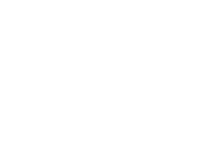

<IPython.core.display.Javascript object>


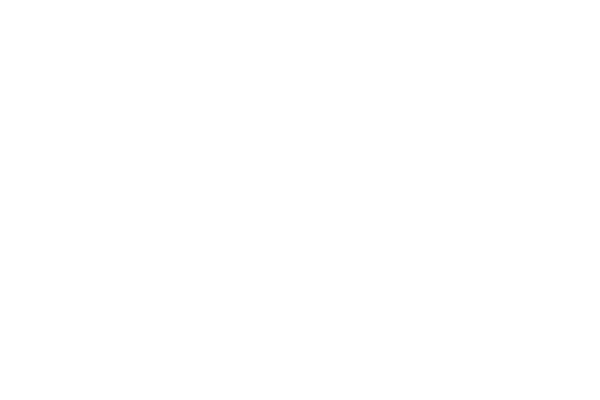

<IPython.core.display.Javascript object>


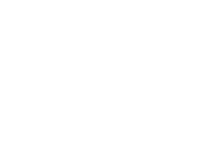

<IPython.core.display.Javascript object>


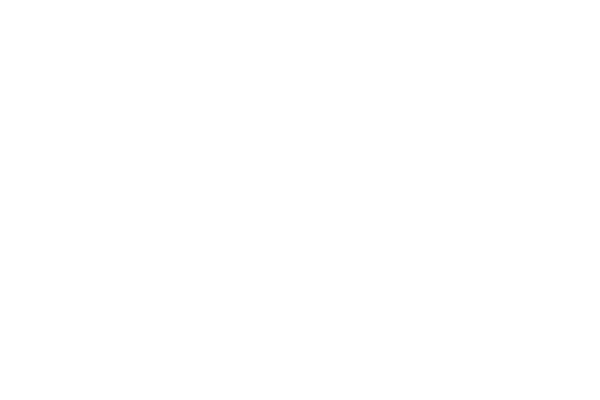

<IPython.core.display.Javascript object>


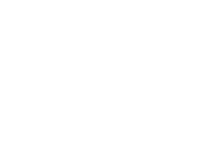

<IPython.core.display.Javascript object>


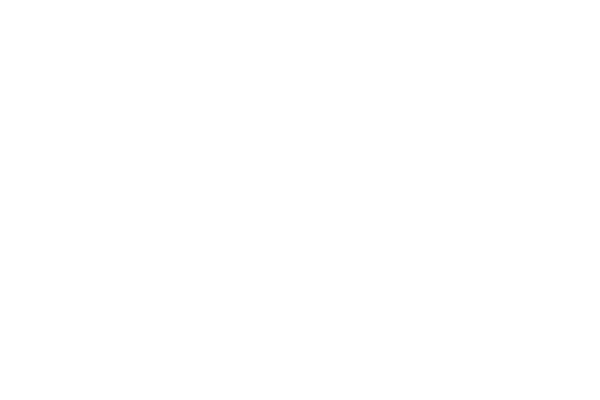

<IPython.core.display.Javascript object>


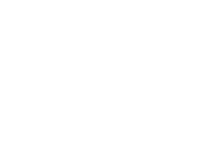

<IPython.core.display.Javascript object>


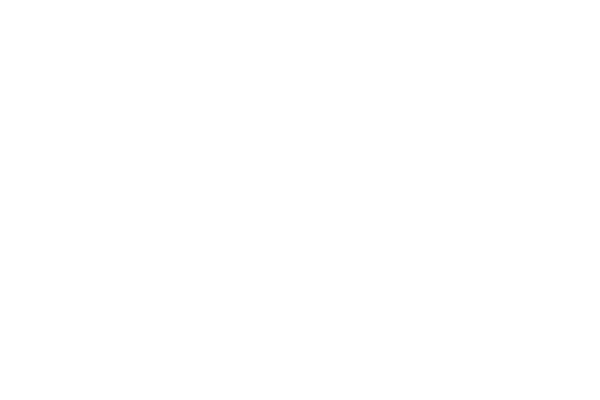

<IPython.core.display.Javascript object>


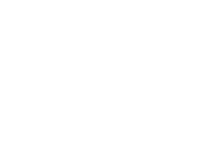

<IPython.core.display.Javascript object>


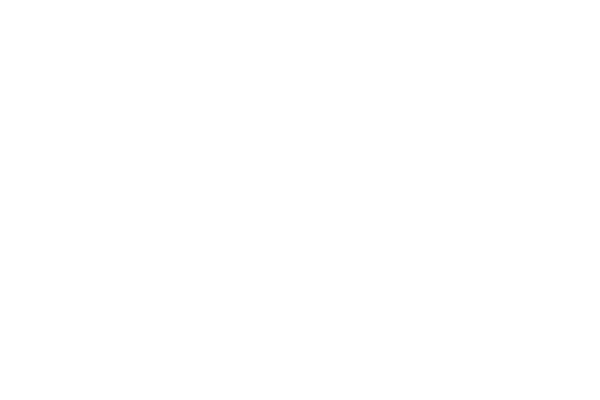

<IPython.core.display.Javascript object>


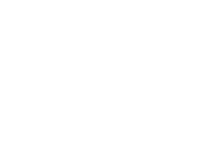

<IPython.core.display.Javascript object>


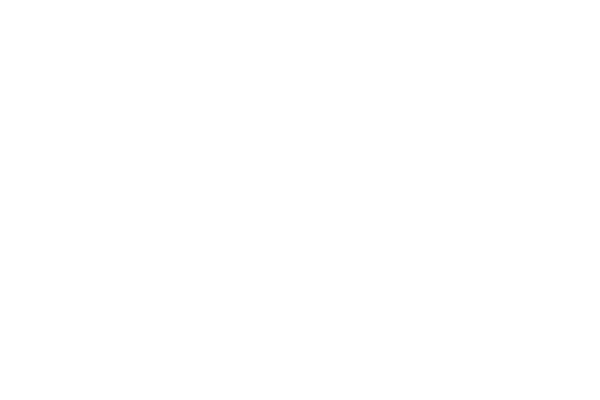

<IPython.core.display.Javascript object>


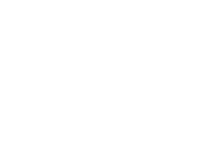

<IPython.core.display.Javascript object>


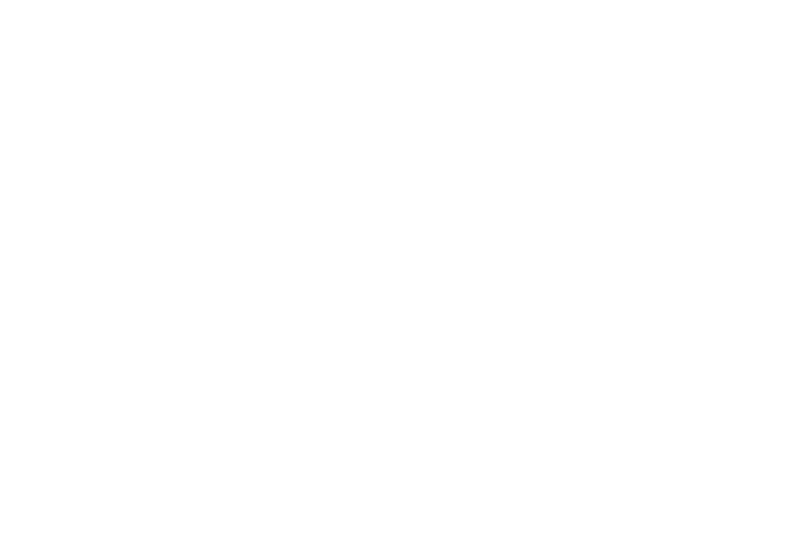

<IPython.core.display.Javascript object>


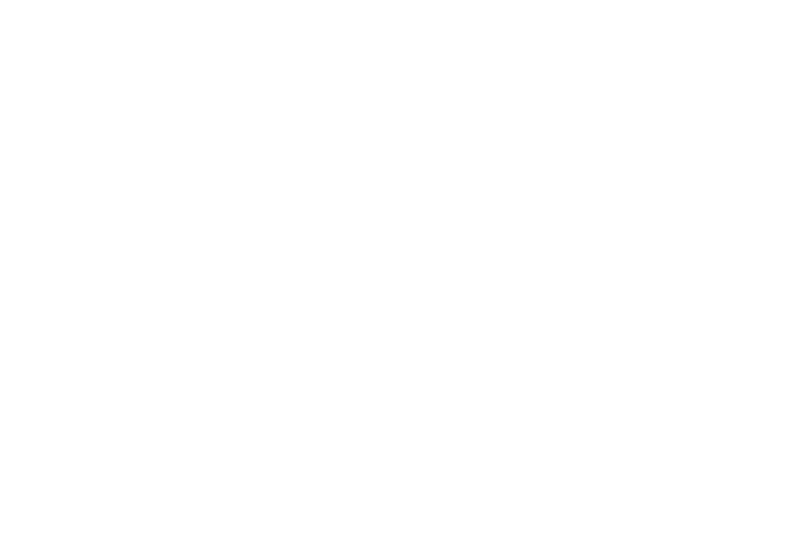

<IPython.core.display.Javascript object>


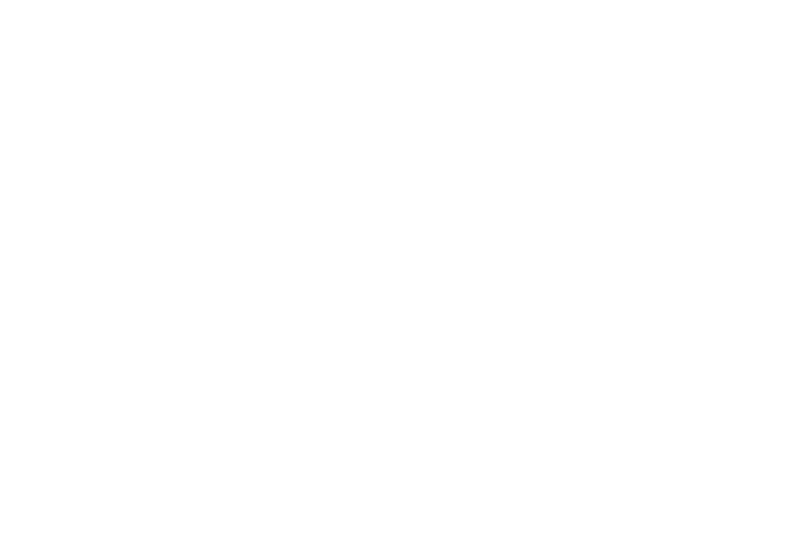

<IPython.core.display.Javascript object>


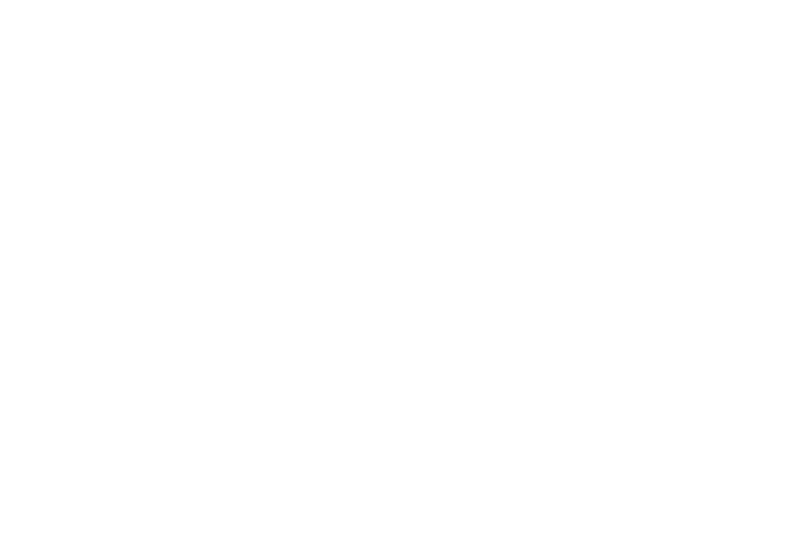

<IPython.core.display.Javascript object>


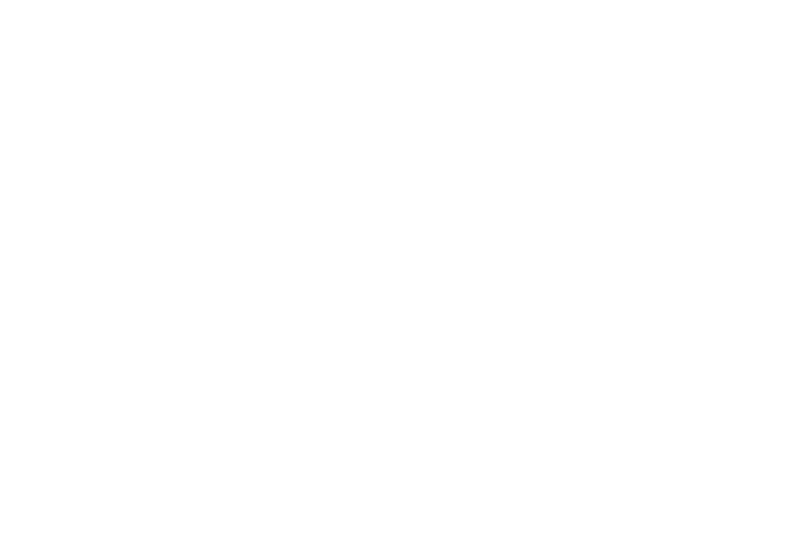

In [55]:
report = pandas_profiling.ProfileReport(df)
report.to_file('../report/dataset/report.html')

# Data prepratation

**The quality and quantity of data that you gather will directly determine how good your predictive model can be.**

- Exploratory data analysis (visualization)
- Select relevant features
- Clean and Missing values imputetion


## Select feature for analysis
Check dataset [documentation](https://github.com/creyesp/houses-project/blob/add-binder-configs/data/dataset_description.md) to choice the most interesting feature to answer our questions.

In [56]:
columns_to_analyze = [
#     'ano_de_construccion', 
    'banos',
    'banos_extra',
    'descripcion',
    'disposicion',
    'distancia_al_mar',
    'dormitorios',
    'dormitorios_extra',
    'estado',
    'extra',
    'garajes',
    'garajes_extra',
    'gastos_comunes',
    'tipo_de_publicacion',
    'm2_de_la_terraza',
    'm2_del_terreno',
    'm2_edificados',
    'oficina',
    'penthouse',
    'plantas',
    'plantas_extra',
    'precio',
    'sobre',
    'tipo_propiedad',
    'vista_al_mar',
    'vivienda_social',
    'barrio', 
]

## Split dataset in numerical and string variables

In [57]:
df_num = df[columns_to_analyze].select_dtypes(exclude='O')
df_obj = df[columns_to_analyze].select_dtypes(include='O')

print('Numerical columns: {}\n'.format(df_num.columns.tolist()))
print('Caterorial columns: {}'.format(df_obj.columns.tolist()))

Numerical columns: ['banos', 'banos_extra', 'distancia_al_mar', 'dormitorios', 'dormitorios_extra', 'garajes', 'garajes_extra', 'gastos_comunes', 'm2_de_la_terraza', 'm2_del_terreno', 'm2_edificados', 'oficina', 'penthouse', 'plantas', 'plantas_extra', 'precio', 'vista_al_mar', 'vivienda_social']

Caterorial columns: ['descripcion', 'disposicion', 'estado', 'extra', 'tipo_de_publicacion', 'sobre', 'tipo_propiedad', 'barrio']


## Missing values imputation

In [58]:
# Fill missing values with zero
fill_zero_col = [
    'm2_de_la_terraza',
    'vivienda_social',
    'gastos_comunes',
    'garajes',
    'garajes_extra',
    'plantas_extra',
    'penthouse',
    'oficina',
]
df_num.loc[:, fill_zero_col] = df_num[fill_zero_col].fillna(0)

# Fill missing values with 1
df_num['plantas'].fillna(1, inplace=True)

# Fill missing value usings other columns
mask_m2_terreno = df_num['m2_del_terreno'].isna()
df_num.loc[mask_m2_terreno, 'm2_del_terreno'] = df_num.loc[mask_m2_terreno, 'm2_edificados']

# Fill missing categories
df_obj['barrio'].fillna('desconocido', inplace=True)
df_obj['disposicion'].fillna('otro', inplace=True)

 ## Feature transformation
 
 Categorical:
 - Nominal: apply ONEHOT encoding to transform to numerical variables (use pd.get_dummies(train, columns = dummy_cols))

In [59]:
df_num['cerca_rambla'] = (df_num['distancia_al_mar'] <= 1000) | (df_num['vista_al_mar'] ).astype(float)
# df_num.drop(columns=['distancia_al_mar', 'vista_al_mar'], inplace=True)

df_num['m2_index'] = df_num['m2_edificados']/df_num['m2_del_terreno']
# df_num.drop(columns=['m2_del_terreno'], inplace=True)

# Categorical transformation
map_status = {
    'en construccion': 3,
    'a estrenar': 3,
    'excelente estado': 3,
    'buen estado': 2,
    'reciclada': 2,
    'requiere mantenimiento': 1,
    'a reciclar': 0,
#     '': np.nan,
}
df_num['estado'] = df_obj['estado'].map(map_status)
df_num['parrilero'] = df_obj['extra'].str.contains('parrillero').fillna(False)
zona = pd.get_dummies(utils.pareto_rule(df_obj['barrio']), prefix='ZN_',)
disp = pd.get_dummies(df_obj['disposicion'], prefix='DISP_')

df_num_final = pd.concat([df_num, zona, disp], axis=1)
df_num_final.drop(columns=['distancia_al_mar', 'vista_al_mar', 'm2_del_terreno'], inplace=True)

## Apply customs filters

In [60]:
df_num_final.quantile([0.01, 0.95]).transpose()

,0.01,0.95
banos,1.00,3.00
banos_extra,0.00,1.00
dormitorios,0.00,4.00
dormitorios_extra,0.00,0.00
garajes,0.00,2.00
garajes_extra,0.00,0.00
gastos_comunes,0.00,16000.00
m2_de_la_terraza,0.00,35.00
m2_edificados,2.62,357.00
oficina,0.00,1.00


In [61]:
mask = (
    df_obj['tipo_propiedad'].isin(['apartamentos', 'casas'])
    & (df_num_final['oficina'] != 1)
#     & (df_num_final['penthouse'] != 1) 
    & (df_num_final['banos'].between(1, 3))
    & (df_num_final['dormitorios'].between(0, 5))
    & (df_num_final['garajes'].between(0, 5))
    & (df_num_final['m2_de_la_terraza'] >= 0)
#     & (df_num_final['m2_del_terreno'] >= 10)
    & (df_num_final['m2_edificados'] >= 10)
    & (df_num_final['gastos_comunes'].between(0, 50000))
    & (df_num_final['precio'].between(0, 2e6))
#     & (df_num_final['cantidad_de_pisos'].between(1, 30))
#     & (df_num_final['ano_de_construccion'].between(1880, 2019))
#     & (df_num_final['aptos_por_piso'].between(1, 20))

)
mask.sum()

18914

## Drop no informative columns and drop missing row

In [62]:
zero_std_col = df_num_final.columns[df_num_final[mask].std() == 0]
df_final = df_num_final[mask].drop(columns=zero_std_col).astype(float).dropna()

In [63]:
df

,acepta_permuta,altura_permitida,ambientes,ambientes_extra,ano_de_construccion,aptos_por_piso,banos,banos_extra,barrio,cantidad_de_pisos,...,precio,precio_moneda,referencia,sobre,tipo_de_publicacion,tipo_propiedad,titulo_publicacion,url,vista_al_mar,vivienda_social
0,nan,nan,nan,nan,nan,nan,3.00,1.00,centro,nan,...,200000.00,nan,CE250,otros,venta,apartamentos,"barrios amorin 1279, centro",https://www.infocasas.com.uy/barrios-amorn-127...,nan,nan
1,nan,nan,nan,nan,nan,nan,2.00,0.00,pocitos,nan,...,315000.00,nan,1F407,NaN,venta,casas,casa pocitos 3 dormitorios/cochera (dueno),https://www.infocasas.com.uy/casa-pocitos-3-do...,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,centro,nan,...,16500.00,nan,FEA0C,NaN,venta,garaje o cocheras,cochera en centro (san jose y rio negro),https://www.infocasas.com.uy/cochera-en-centro...,nan,nan
3,nan,nan,nan,nan,1991.00,nan,1.00,0.00,punta carretas,nan,...,150000.00,nan,45F92,NaN,venta,apartamentos,apartamento - punta carretas. impecable!,https://www.infocasas.com.uy/apartamento-punta...,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,...,nan,nan,NaN,NaN,NaN,NaN,parque,https://www.infocasas.com.uy/proyectos/parque/...,nan,nan
5,nan,nan,nan,nan,2007.00,nan,3.00,1.00,pocitos nuevo,nan,...,329000.00,nan,556CB,NaN,venta,casas,cas pocitos 3 dorm (1 sui) 3 ban gge excl pati...,https://www.infocasas.com.uy/cas-pocitos-3-dor...,nan,nan
6,nan,nan,nan,nan,2012.00,nan,3.00,1.00,punta carretas,nan,...,650000.00,nan,97353,NaN,venta,apartamentos,apartamento en venta 4 dormitorios,https://www.infocasas.com.uy/apartamento-en-ve...,nan,nan
7,nan,nan,1.00,0.00,nan,nan,1.00,0.00,cordon,nan,...,190000.00,nan,5e9FE,NaN,venta,locales comerciales,amplio local esquina,https://www.infocasas.com.uy/amplio-local-esqu...,nan,nan
8,nan,nan,nan,nan,2015.00,nan,1.00,0.00,buceo,nan,...,273000.00,nan,5D7F0,NaN,venta,apartamentos,departamento - buceo,https://www.infocasas.com.uy/departamento-buce...,nan,nan
9,nan,nan,nan,nan,nan,nan,1.00,0.00,villa espanola,nan,...,76000.00,nan,5E0EF,NaN,venta,casas,ideal inversor!! casa 3 dorm. + apto 1 dorm co...,https://www.infocasas.com.uy/ideal-inversor-ca...,nan,nan


In [64]:
utils.info(df_final)

,dtypes,isnull,%null,nunique
banos,float64,False,0.00,3
banos_extra,float64,False,0.00,2
dormitorios,float64,False,0.00,6
dormitorios_extra,float64,False,0.00,2
garajes,float64,False,0.00,6
garajes_extra,float64,False,0.00,2
gastos_comunes,float64,False,0.00,741
m2_de_la_terraza,float64,False,0.00,209
m2_edificados,float64,False,0.00,538
penthouse,float64,False,0.00,2


## Binning
Some variable like years or ages is an example of a feature type that might benefit from transformation into a discrete variable.

In [65]:
# pd.cut(df.ano_de_construccion, bins=np.arange(1880, 2020, 10))

## Save ready dataset 

In [66]:
df_final.to_csv('../data/ready/dataset_houses.csv', index=False)

<IPython.core.display.Javascript object>


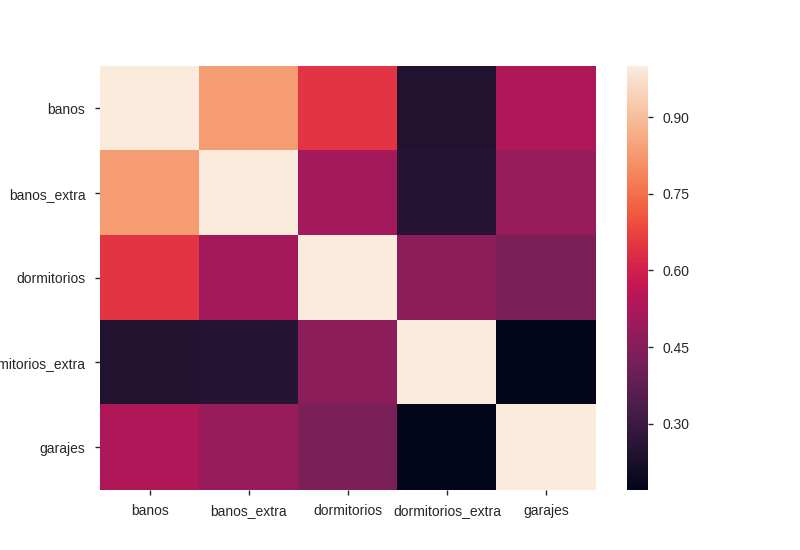

In [67]:
sns.heatmap(df_final.corr().iloc[:5, :5])

## Feature Scaling
The continuous variables in our dataset are at varying scales.
This poses a problem for many popular machine learning algorithms which often use Euclidian distance between data points to make the final predictions. Standardising the scale for all continuous variables can often result in an increase in performance of machine learning models.    



In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

In [69]:
# scaler = QuantileTransformer(output_distribution='normal') 
# scaler = PowerTransformer(method='yeo-johnson')
scaler = StandardScaler()
# scaler = MinMaxScaler()

In [70]:
data_set = df_final.drop(columns=['precio'])
target = df_final['precio']

norm = pd.DataFrame(scaler.fit_transform(data_set), columns=data_set.columns)

<IPython.core.display.Javascript object>


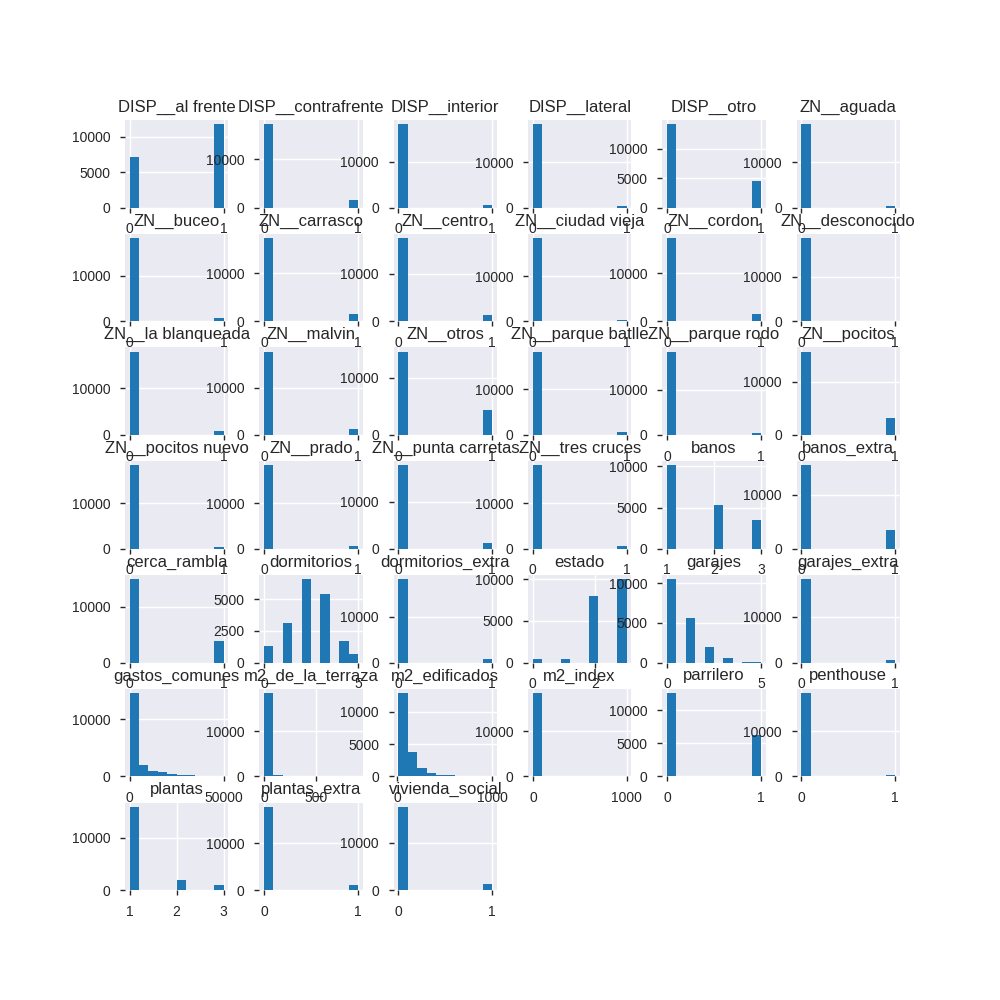

In [71]:
data_set.hist(figsize=(10, 10));

<IPython.core.display.Javascript object>


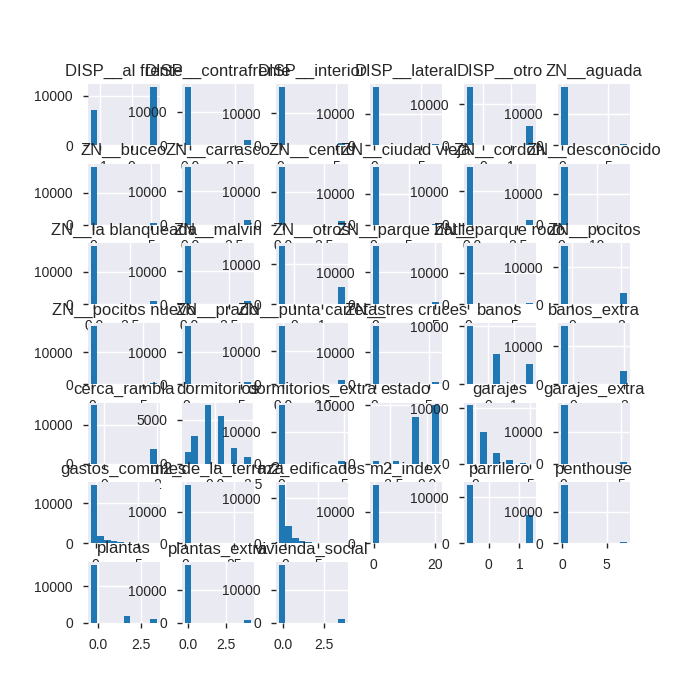

In [72]:
norm.hist(figsize=(7,7));

In [73]:
norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
banos,18835.00,0.00,1.00,-0.84,-0.84,-0.84,0.46,1.75
banos_extra,18835.00,0.00,1.00,-0.48,-0.48,-0.48,-0.48,2.10
dormitorios,18835.00,-0.00,1.00,-1.95,-0.24,-0.24,0.62,2.34
dormitorios_extra,18835.00,-0.00,1.00,-0.20,-0.20,-0.20,-0.20,5.06
garajes,18835.00,0.00,1.00,-0.75,-0.75,-0.75,0.44,5.21
garajes_extra,18835.00,-0.00,1.00,-0.18,-0.18,-0.18,-0.18,5.48
gastos_comunes,18835.00,0.00,1.00,-0.55,-0.55,-0.55,0.11,7.11
m2_de_la_terraza,18835.00,0.00,1.00,-0.27,-0.27,-0.27,-0.16,33.36
m2_edificados,18835.00,-0.00,1.00,-1.01,-0.57,-0.36,0.19,9.01
penthouse,18835.00,0.00,1.00,-0.14,-0.14,-0.14,-0.14,7.26


# Why Feature Selection?
- Overfitting
- Occam’s Razor: "Entities should not be multiplied without necessity."  William of Ockham
- Garbage In Garbage out: Most of the times, we will have many non-informative features.

Type of Feature Selection:

- Filter based: We specify some metric and based on that filter features. An example of such a metric could be correlation/chi-square.
- Wrapper-based: Wrapper methods consider the selection of a set of features as a search problem. Example: Recursive Feature Elimination
- Embedded: Embedded methods use algorithms that have built-in feature selection methods. For instance, Lasso and RF have their own feature selection methods.



In [74]:
num_feats = 20
feature_name = data_set.columns.to_list()


## Filter based
Pearson correlation
We check the absolute value of the Pearson’s correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion.

In [75]:
corr = df_final.corr()['precio'].drop('precio')
high_corr = np.abs(corr) > 0.5
corr_feature = high_corr.index.tolist()
corr_support = high_corr.to_numpy()


## Recursive Feature Elimination


In [76]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=num_feats, step=1, verbose=5, )
rfe_selector.fit(data_set, target)
rfe_support = rfe_selector.get_support()
rfe_feature = data_set.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
20 selected features


## Embebed
Embedded methods use algorithms that have built-in feature selection methods.

### Lasso
For example, Lasso and RF have their own feature selection methods. Lasso Regularizer forces a lot of feature weights to be zero.

In [77]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

embeded_lr_selector = SelectFromModel(Lasso(), max_features=num_feats)
embeded_lr_selector.fit(data_set, target)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = data_set.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

20 selected features


In [78]:
embeded_lr_feature

['banos',
 'banos_extra',
 'dormitorios_extra',
 'garajes',
 'garajes_extra',
 'penthouse',
 'plantas_extra',
 'estado',
 'ZN__aguada',
 'ZN__buceo',
 'ZN__carrasco',
 'ZN__centro',
 'ZN__ciudad vieja',
 'ZN__cordon',
 'ZN__la blanqueada',
 'ZN__pocitos nuevo',
 'ZN__prado',
 'ZN__punta carretas',
 'ZN__tres cruces',
 'DISP__otro']

### RandomForest
We can also use RandomForest to select features based on feature importance.

In [79]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=10), max_features=num_feats)
embeded_rf_selector.fit(data_set, target)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = data_set.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [80]:
from sklearn.tree import DecisionTreeRegressor

embeded_rf_selector = SelectFromModel(DecisionTreeRegressor(), max_features=num_feats)
embeded_rf_selector.fit(data_set, target)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = data_set.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

5 selected features


In [81]:
# from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMRegressor

lgbr=LGBMRegressor(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbr, max_features=num_feats)
embeded_lgb_selector.fit(data_set, target)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = data_set.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

11 selected features


In [82]:
# put all selection together
feature_selection_df = pd.DataFrame(
    {
        'Feature':feature_name, 
        'Pearson':corr_support, 
        'RFE':rfe_support, 
        'Logistics':embeded_lr_support,
        'Random Forest':embeded_rf_support,
        'LightGBM':embeded_lgb_support
    })
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,RFE,Logistics,Random Forest,LightGBM,Total
1,garajes,True,False,True,True,True,4
2,banos,True,False,True,True,True,4
3,m2_edificados,True,False,False,True,True,3
4,m2_index,False,False,False,True,True,2
5,gastos_comunes,False,False,False,True,True,2
6,estado,False,False,True,False,True,2
7,dormitorios,True,False,False,False,True,2
8,banos_extra,True,False,True,False,False,2
9,ZN__tres cruces,False,True,True,False,False,2
10,ZN__prado,False,True,True,False,False,2
